## 参考资料

知乎专栏《史上最详细的 XGBoost 实战》
https://zhuanlan.zhihu.com/p/31182879

## XGBoost 的并行是在特征粒度上的

## XGBoost 在代价函数里加入了正则项，用于控制模型的复杂度

## 目标函数二阶可导

XGBoost 支持用户自定义目标函数和评估函数，只要目标函数二阶可导就行。

## 缺失值处理

对于特征的值有缺失的样本，xgboost 可以自动学习出它的分裂方向。



XGBoost 有两大类接口：

1、XGBoost 原生接口；
2、scikit-learn 接口。

并且 XGBoost 能够实现分类和回归两种任务。

因此，本章节分四个小块来介绍。

## 1、基于 XGBoost 原生接口的分类

In [1]:
from sklearn.datasets import load_iris
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
iris = load_iris()

X = iris.data
y = iris.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2, random_state=666)

In [5]:
params = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',
    'num_class': 3,
    'gamma': 0.1,
    'max_depth': 6,
    'lambda': 2,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'min_child_weight': 3,
    'silent': 1,
    'eta': 0.1,
    'seed': 1000,
    'nthread': 4,
}

In [7]:
plst = params.items()
plst

dict_items([('booster', 'gbtree'), ('objective', 'multi:softmax'), ('num_class', 3), ('gamma', 0.1), ('max_depth', 6), ('lambda', 2), ('subsample', 0.7), ('colsample_bytree', 0.7), ('min_child_weight', 3), ('silent', 1), ('eta', 0.1), ('seed', 1000), ('nthread', 4)])

In [8]:
dtrain = xgb.DMatrix(X_train, y_train)
dtrain

In [10]:
num_rounds = 500
model = xgb.train(plst, dtrain, num_rounds)
model

In [11]:
dtest = xgb.DMatrix(X_test)
dtest

In [14]:
y_pred = model.predict(dtest)
y_pred

array([1., 2., 1., 2., 0., 1., 1., 2., 1., 1., 1., 0., 0., 0., 2., 1., 0.,
       2., 2., 2., 1., 0., 2., 0., 1., 1., 0., 1., 2., 2.], dtype=float32)

In [16]:
# 全部预测正确
y_test == y_pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [15]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

1.0

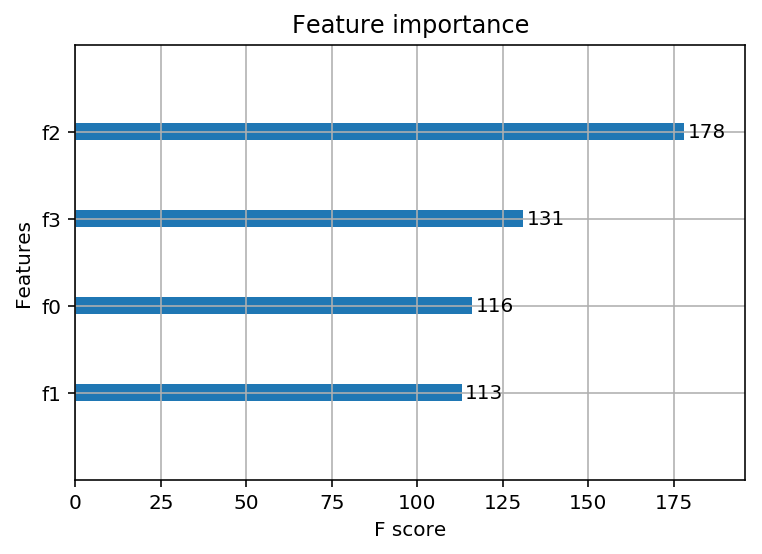

In [18]:
# 显示特征的重要性
plot_importance(model)
plt.show()

## 基于 XGBoost 原生接口的回归

In [45]:
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

In [46]:
boston = load_boston()
X = boston.data
y = boston.target

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2, random_state=666)

In [63]:
from matplotlib.font_manager import FontProperties
font = FontProperties(fname='/System/Library/Fonts/STHeiti Light.ttc', size=18)


def regressor_plot(regressor, name):
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    indexes = y_test.argsort()
    plt.figure(figsize=(6, 4))
    plt.plot(range(len(indexes)), y_test[indexes], label='true')
    plt.plot(range(len(indexes)), y_pred[indexes], label='pred')
    plt.legend()
    plt.title('回归器名称：{}'.format(name), fontproperties=font)
    plt.show()
    print('r2_score:{}'.format(
        r2_score(y_test, y_pred)))

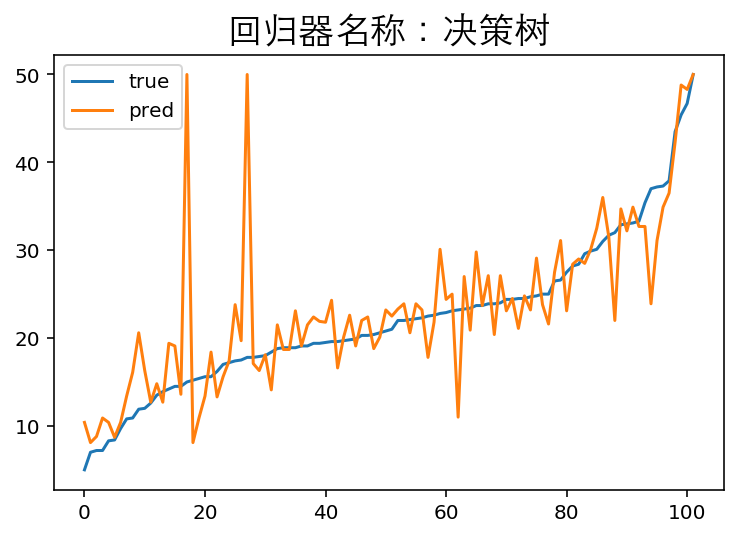

r2_score:0.5296852557702595


In [64]:
# 我先用决策树回归试试看

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score


regressor = DecisionTreeRegressor()
regressor_plot(regressor, '决策树')

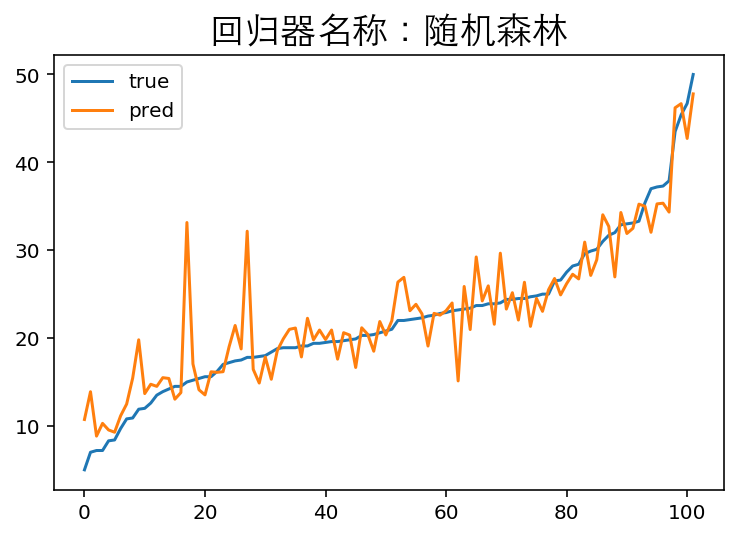

r2_score:0.8405012220822909


In [66]:
# 改成随机森林回归

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

regressor = RandomForestRegressor()
regressor_plot(regressor, '随机森林')

可以看出，随机森林回归还挺不错的。

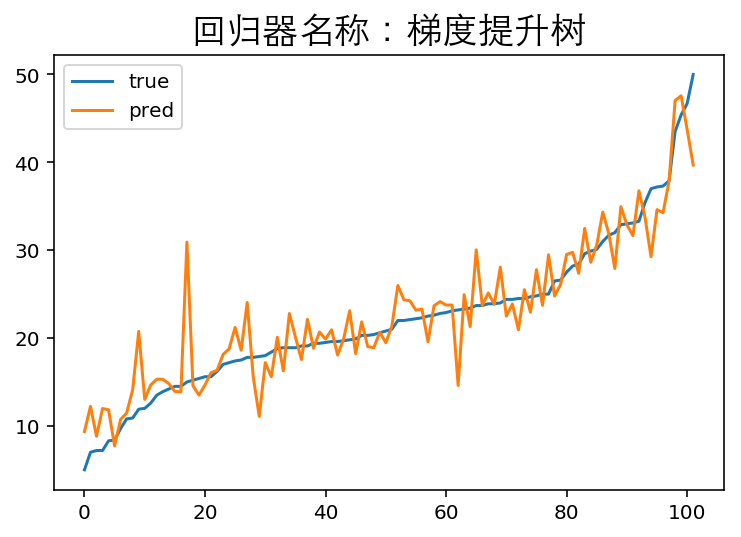

r2_score:0.8497904116791974


In [68]:
from sklearn.ensemble import GradientBoostingRegressor


regressor = GradientBoostingRegressor()
regressor_plot(regressor, '梯度提升树')

梯度提升树比随机森林又好了一些。

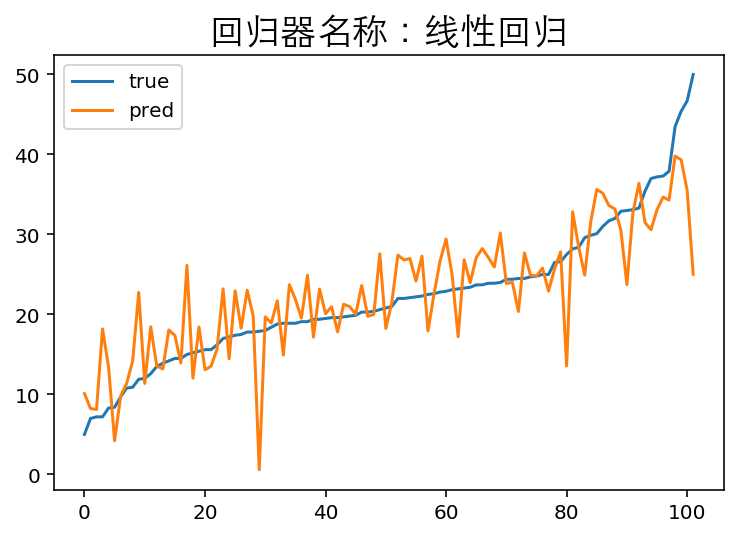

r2_score:0.6334467294899586


In [69]:
from sklearn.linear_model import LinearRegression


regressor = LinearRegression()
regressor_plot(regressor, '线性回归')

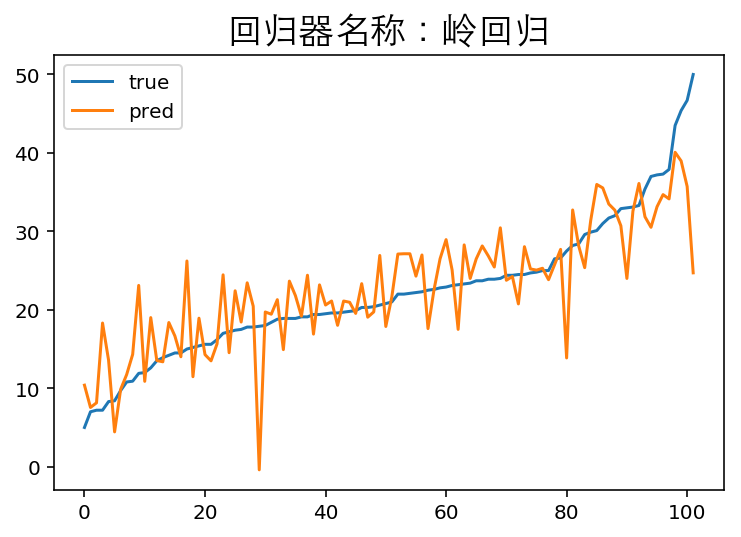

r2_score:0.6258698119571771


In [70]:
from sklearn.linear_model import Ridge


regressor = Ridge()
regressor_plot(regressor, '岭回归')

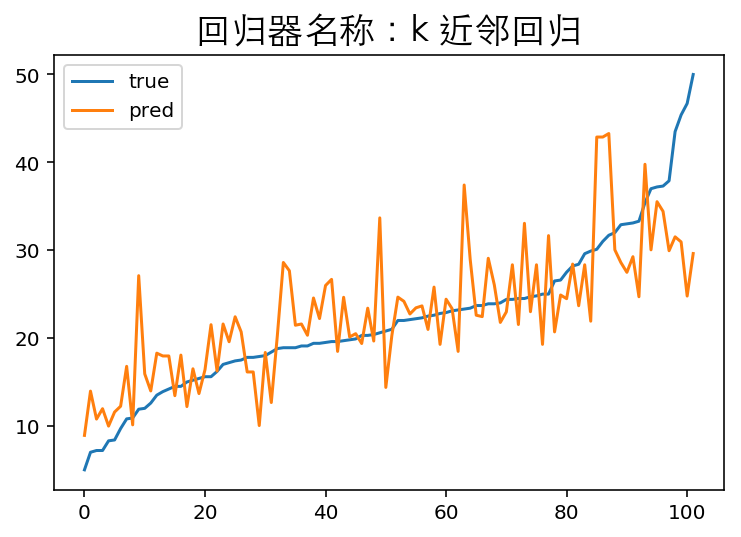

r2_score:0.48824123796594976


In [71]:
from sklearn.neighbors import KNeighborsRegressor


regressor = KNeighborsRegressor()
regressor_plot(regressor, 'k 近邻回归')

In [24]:
# 这里目标函数换成回归了

params = {
    'booster': 'gbtree',
    'objective': 'reg:gamma',
    'gamma': 0.1,
    'max_depth': 5,
    'lambda': 3,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'min_child_weight': 3,
    'silent': 1,
    'eta': 0.1,
    'seed': 1000,
    'nthread': 4,
}

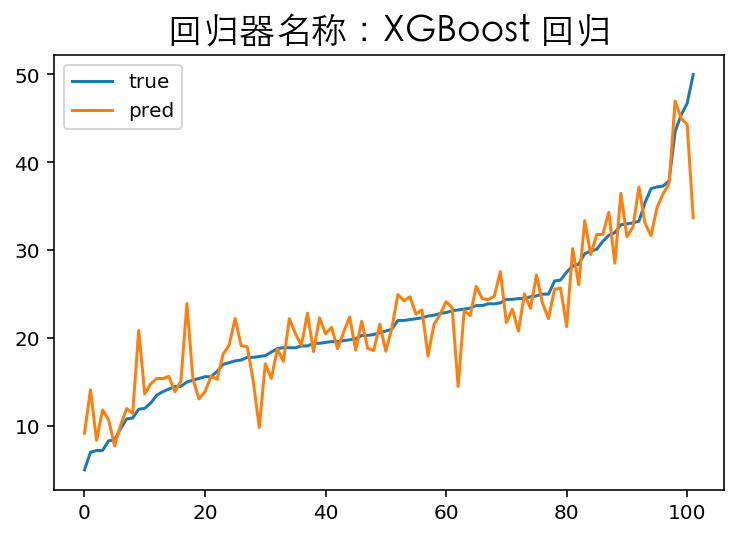

r2_score:0.8566029205036608


In [74]:
dtrain = xgb.DMatrix(X_train, y_train)
num_rounds = 300
plst = params.items()
model = xgb.train(plst, dtrain, num_rounds)

# 对测试集进行预测
dtest = xgb.DMatrix(X_test)
y_pred = model.predict(dtest)

indexes = y_test.argsort()
plt.figure(figsize=(6, 4))
plt.plot(range(len(indexes)), y_test[indexes], label='true')
plt.plot(range(len(indexes)), y_pred[indexes], label='pred')
plt.legend()
plt.title('回归器名称：{}'.format('XGBoost 回归'), fontproperties=font)
plt.show()
print('r2_score:{}'.format(r2_score(y_test, y_pred)))

可以看到：比梯度提升数确实还好一些。

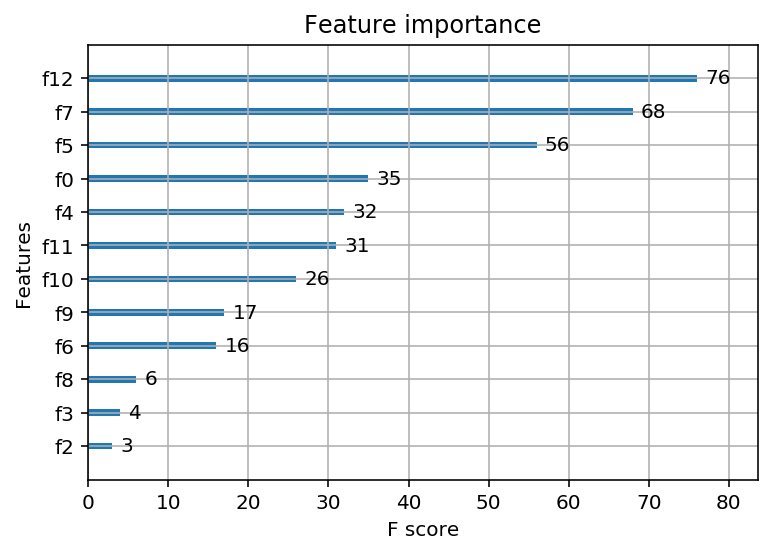

In [76]:
# 显示重要特征
plot_importance(model)
plt.show()

值越大，说明该特征越重要。